In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from PIL import ImageFile
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [2]:
#base_dir = './dataset_label'
base_dir = 'D:\\project_235C_dataset\\resource\\dataset_label'
train_dir = os.path.join(base_dir, 'train_data')
train_positive_dir = os.path.join(train_dir, 'Positive')
train_negative_dir = os.path.join(train_dir, 'Negative')
validation_dir_root = os.path.join(base_dir, 'Validation')
validation_dir_pos = os.path.join(validation_dir_root, 'Positive')
validation_dir_neg = os.path.join(validation_dir_root, 'Negative')
test_dir = os.path.join(base_dir, 'test')
#test_dir_pos = os.path.join(test_dir, 'positive')
#test_dir_neg = os.path.join(test_dir, 'negative')

print(validation_dir_pos)
print(test_dir)


D:\project_235C_dataset\resource\dataset_label\Validation\Positive
D:\project_235C_dataset\resource\dataset_label\test


In [4]:
train_positive_fnames = os.listdir(train_positive_dir)
train_negative_fnames = os.listdir(train_negative_dir)

print('Total training positive images         :', len(os.listdir(train_positive_dir)))
print('Total training negative images         :', len(os.listdir(train_negative_dir)))
print('Total positive validation test images  :', len(os.listdir(validation_dir_pos)))
print('Total Negative validation test images  :', len(os.listdir(validation_dir_neg)))
print('Total Test data images                 :', len(os.listdir(os.path.join(test_dir))))

Total training positive images         : 1096
Total training negative images         : 345
Total positive validation test images  : 372
Total Negative validation test images  : 122
Total Test data images                 : 409


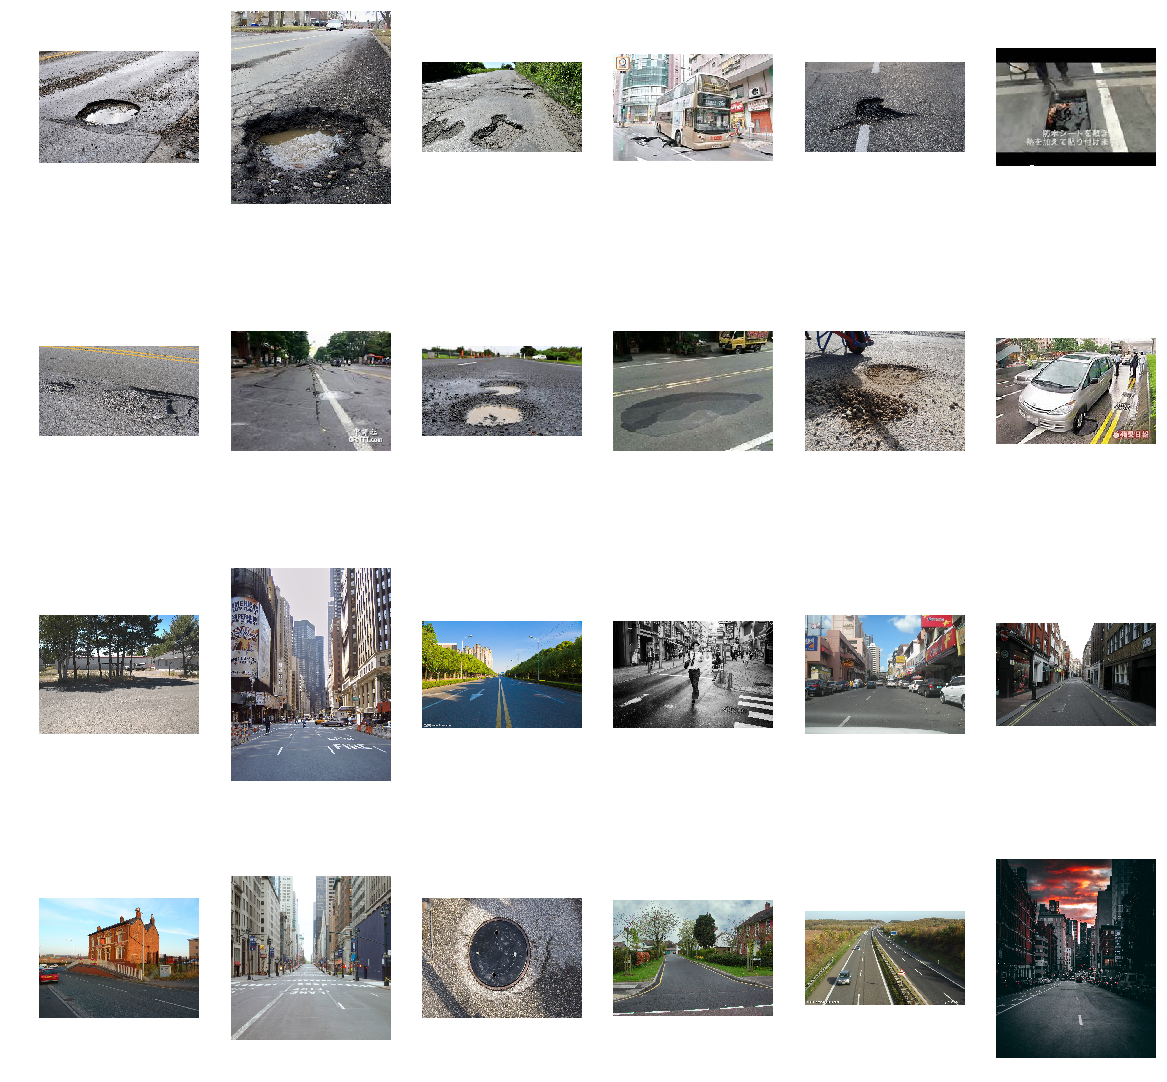

In [5]:
fig = plt.figure(figsize=(20, 20))
pic_index = 0
pic_index += 12
next_pos_pix = [os.path.join(train_positive_dir, fname) 
                for fname in train_positive_fnames[pic_index-12:pic_index]]
next_neg_pix = [os.path.join(train_negative_dir, fname) 
                for fname in train_negative_fnames[pic_index-12:pic_index]]

for idx, img_path in enumerate(next_pos_pix+next_neg_pix):
  fig.add_subplot(4, 6, idx + 1).axis('Off')   # indices start at 1

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
# the input shape should be 150x150x3, the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

convet= layers.Conv2D(16, 3, activation='relu')(img_input)
convet = layers.MaxPooling2D(2)(convet)

convet = layers.Conv2D(32, 3, activation='relu')(convet)
convet = layers.MaxPooling2D(2)(convet)

convet = layers.Conv2D(64, 3, activation='relu')(convet)
convet = layers.MaxPooling2D(2)(convet)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# Flatten feature map
convet = layers.Flatten()(convet)
convet = layers.Dense(512, activation='relu')(convet)
output = layers.Dense(1, activation='sigmoid')(convet)
model = Model(img_input, output)

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [9]:
"""
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
"""              
# Compile model
#decay
#lr = 0.001
#adam = Adam(lr=lr, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
"""
image_data_generator = ImageDataGenerator(
                        rescale=1./255,   #normalization
                        shear_range=0.2,
                        zoom_range=0.2,  # Randomly zoom image  
                        horizontal_flip=True)  #horizontally flip images
                        """
train_data_generator = ImageDataGenerator(
                        rescale=1./255,   #normalization
                        shear_range=0.2,
                        zoom_range=0.2,  # Randomly zoom image  
                        horizontal_flip=True)  #horizontally flip images

val_data_generator = ImageDataGenerator(rescale=1./255)
                        

print(train_positive_dir)


# Flow training images by using image_data_generator
train_generator = train_data_generator.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  # resized to 150x150
        batch_size= 32,
        class_mode='binary',
        shuffle=True)

# Flow validation images by using image_data_generator
validation_generator = val_data_generator.flow_from_directory(
        validation_dir_root,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


D:\project_235C_dataset\resource\dataset_label\train_data\Positive
Found 1441 images belonging to 2 classes.
Found 494 images belonging to 2 classes.


In [11]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch= train_generator.n//train_generator.batch_size,  
      epochs=30,
      validation_data=validation_generator,
      #validation_steps= validation_generator.n//validation_generator.batch_size,  
      verbose=1
      )

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
46/46 [==============================] - 91s 2s/step - loss: 0.5509 - acc: 0.7523 - val_loss: 0.5637 - val_acc: 0.7814
Epoch 2/30
46/46 [==============================] - 71s 2s/step - loss: 0.4918 - acc: 0.8057 - val_loss: 0.5671 - val_acc: 0.7733
Epoch 3/30
46/46 [==============================] - 74s 2s/step - loss: 0.4785 - acc: 0.7974 - val_loss: 0.4632 - val_acc: 0.8016
Epoch 4/30
46/46 [==============================] - 75s 2s/step - loss: 0.4373 - acc: 0.8230 - val_loss: 0.4625 - val_acc: 0.8360
Epoch 5/30
46/46 [==============================] - 72s 2s/step - loss: 0.4947 - acc: 0.8140 - val_loss: 0.4799 - val_acc: 0.8057
Epoch 6/30
46/46 [==============================] - 78s 2s/step - loss: 0.4273 - acc: 0.8321 - val_loss: 0.5043 - val_acc: 0.8036
Epoch 7/30
46/46 [==============================] - 75s 2s/step - loss: 0.4074 - acc: 0.8411 - val_loss: 0.4327 - val_acc: 0.8239
Epoch 8/30
46/46 [========================

In [13]:
model.save('pothole_img_cnn.h5')

C:\MSDA\anaconda\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


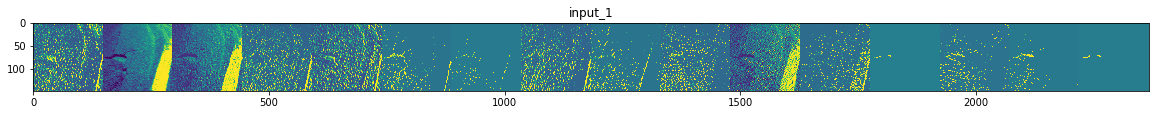

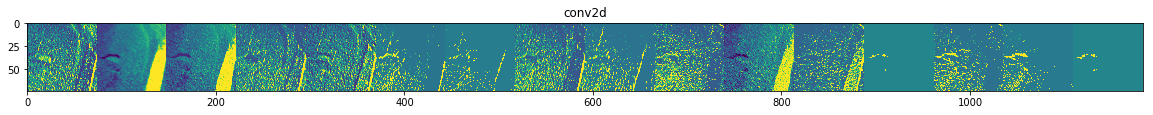

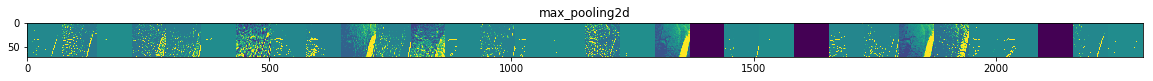

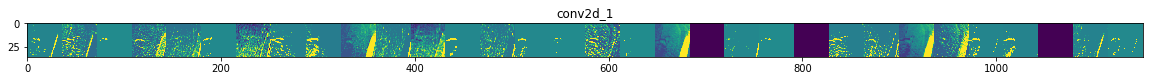

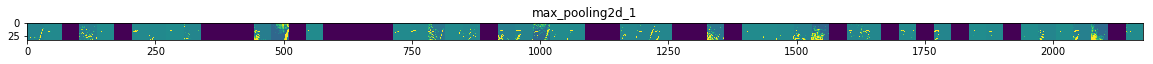

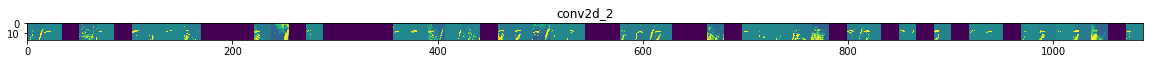

In [14]:
# define a Model that take an image as input, and output representations for each layer except the first one 
layer_outputs = [layer.output for layer in model.layers[1:]]
new_model = Model(img_input, layer_outputs)

# pick a random input image.
pos_img = [os.path.join(train_positive_dir, f) for f in train_positive_fnames]
neg_img = [os.path.join(train_negative_dir, f) for f in train_negative_fnames]
img_path = random.choice(pos_img + neg_img)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
 
x /= 255  # Rescale

layer_feature_maps = new_model.predict(x)
layer_names = [layer.name for layer in model.layers] # name for plot

for layer_name, feature_map in zip(layer_names, layer_feature_maps):
  if len(feature_map.shape) == 4:  # for the conv / maxpool layers
    n_features = feature_map.shape[-1]  # number of features in feature map, the shape(1, size, size, n_features)
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
   
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5,1,'Training and Validation loss')

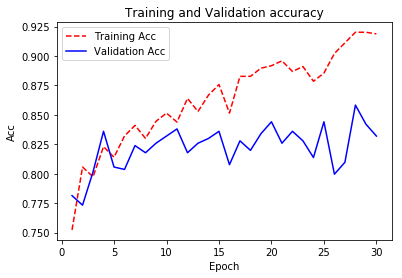

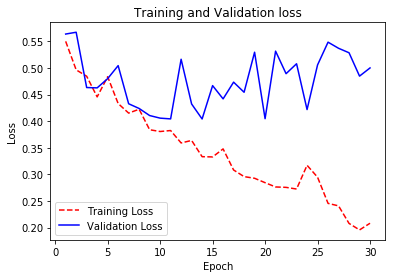

In [58]:
# generate the accuracy and loss for each training epoch
training_acc = history.history['acc']
test_acc = history.history['val_acc']

training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_acc) + 1)

plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Training and Validation accuracy')
plt.figure()

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation loss')


In [16]:
score1 = model.evaluate_generator(validation_generator,workers=12)
print(score1)


[0.5059649692848325, 0.8319838]


In [43]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
#import model_evaluation_utils as meu
%matplotlib inline

IMG_DIM = (150, 150)
input_shape = (150, 150, 3)

num2class_label_transformer = lambda l: ['not pothole' if x < 0.3 else 'pothole' for x in l]
class2num_label_transformer = lambda l: [1 if x.endswith('p') or x.startswith('extra') else 0 for x in l]



In [44]:
test_files =glob.glob("D:\\project_235C_dataset\\resource\\dataset_label\\test\\*")
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in test_files]
#print(test_labels)

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)  # ture labels

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])


Test dataset shape: (409, 150, 150, 3)
['10n', '10p', '11n', '11p', '12n'] [0, 1, 0, 1, 0]


In [45]:
#dir(model)

In [46]:
import model_evaluation_utils as meu
predictions = model.predict(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=num2class_label_transformer(test_labels_enc), predicted_labels=predictions, 
                                      classes=list(set(num2class_label_transformer(test_labels_enc))))


Model Performance metrics:
------------------------------
Accuracy: 0.7506
Precision: 0.754
Recall: 0.7506
F1 Score: 0.7178

Model Classification report:
------------------------------
             precision    recall  f1-score   support

    pothole       0.75      0.95      0.84       275
not pothole       0.77      0.34      0.47       134

avg / total       0.75      0.75      0.72       409


Prediction Confusion Matrix:
------------------------------
                    Predicted:            
                       pothole not pothole
Actual: pothole            261          14
        not pothole         88          46


In [55]:
type(model.predict(test_imgs_scaled, verbose=0))

numpy.ndarray

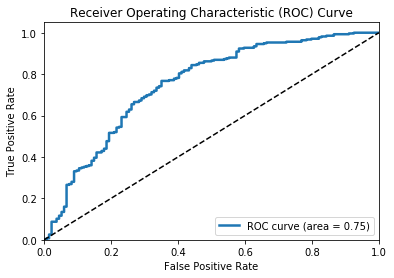

In [57]:
from sklearn.metrics import roc_curve, auc 
fpr, tpr, _ = roc_curve(test_labels_enc, model.predict(test_imgs_scaled, verbose=0))   
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'.format(roc_auc), linewidth=2.5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
print(confusion_matrix(num2class_label_transformer(test_labels_enc), predictions, labels=None, sample_weight=None))

[[ 46  88]
 [ 14 261]]


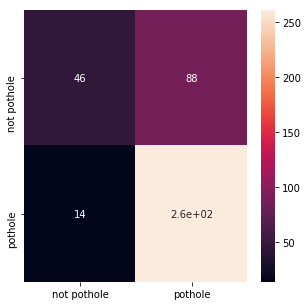

In [48]:
import pandas as pd
cm=confusion_matrix(num2class_label_transformer(test_labels_enc), predictions, labels=None, sample_weight=None)
plt.figure(figsize = (5,5))
df_cm = pd.DataFrame(cm, index = [i for i in ['not pothole','pothole']],
                  columns = [i for i in ['not pothole','pothole']])

ax=sns.heatmap(df_cm, annot=True)

(1, 150, 150, 3)
[[0.9982893]]
	class: pothole


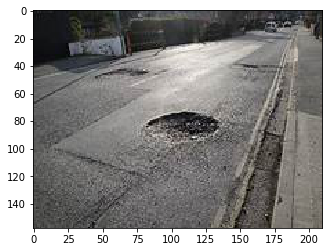

In [23]:
#predict positive image
test_path = os.path.join(test_dir, '1p.jpg')
image = load_img(test_path, target_size=(150,150))
image_arr = img_to_array(image) # convert from PIL Image to NumPy array
image_arr = np.expand_dims(image_arr, axis=0)
print(image_arr.shape)

image_arr /= 255
prediction_array = model.predict(image_arr)
print(prediction_array)

img = mpimg.imread(test_path)
plt.imshow(img)
if prediction_array[0][0] > 0.3:
    print("\tclass: pothole")
else: 
    print("\tclass: not pothole")

(1, 150, 150, 3)
[[0.20244211]]

	class: not pothole


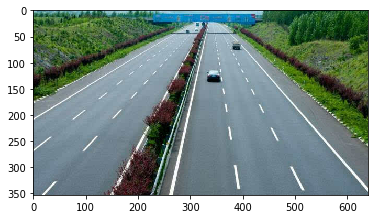

In [25]:
#predict negatvie image
test_path = os.path.join(test_dir, '16n.jpg')
image = load_img(test_path, target_size=(150,150))
image_arr = img_to_array(image) 
image_arr = np.expand_dims(image_arr, axis=0)
print(image_arr.shape)

image_arr /= 255
prediction_array = model.predict(image_arr)
print(prediction_array)
print()

testpath = os.path.join(test_dir, '16n.jpg')
img = mpimg.imread(testpath)
plt.imshow(img)
if prediction_array[0][0] > 0.3:
    print("\tclass: pothole")
else: 
    print("\tclass: not pothole")